In [1]:
import os
import numpy as np
from scipy import spatial as sspat
import pandas as pd
import matplotlib.pyplot as plt

/Users/ivasenkov15/miniconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
EPS = 1e-7


def calculate_relative_L1_error(nodes1 :np.ndarray, values1 :np.ndarray, nodes2 :np.ndarray, values2 :np.ndarray):
    """
    
    1. Map mesh nodes1 -> mesh nodes2 (Nearest Neighbor)
    2. Denominator = MAX(|Vc|, |Vf|)
    3. Metric = Sum( |Diff| / Denom ) / N_nodes1
    """
    if nodes1 is None or nodes2 is None:
        return 0.0, []

    n = values1.shape[0] * values1.shape[1]
    
    # Map nodes1 to nodes2
    tree = sspat.cKDTree(nodes2)
    dists, idx = tree.query(nodes1, k=1)
    values2_mapped = values2[idx]

    # Denominator: Max of absolute values
    denominator = np.abs(values1) + np.abs(values2_mapped)
    
    # Numerator: Absolute Difference
    diff = np.abs(values1 - values2_mapped)
    
    # Filter valid comparisons
    mask = denominator > EPS
    
    if np.sum(mask) == 0:
        return 0.0, []
        
    # Sum of Relative Differences
    valid_terms = diff[mask] / denominator[mask]
    sum_diff = np.sum(valid_terms)
    
    # Normalize by N
    return sum_diff / n, list(valid_terms)

In [3]:
BASE_FOLDER = 'testcases'


def get_test_folders(base_folder=BASE_FOLDER):
    for _, next_folders, _ in os.walk(base_folder):
        return list(map(lambda x: f'{base_folder}/{x}', filter(lambda x: x.startswith('test'), next_folders)))
    return None


def get_test_filename(folder, label):
    for _, _, filenames in os.walk(folder):
        for filename in filenames:
            if label in filename:
                return f'{folder}/{filename}'
    return None


def read_data(filename, coord_cols, vals_cols):
    ds = pd.read_csv(filename)
    return np.asarray(ds[coord_cols]), np.asarray(ds[vals_cols])


def get_relative_error(test_folder, coord_cols, ansys_val_cols, matlab_vals_cols, matlab_label, ansys_label):
    matlab_filename = get_test_filename(test_folder, matlab_label)
    ansys_filename = get_test_filename(test_folder, ansys_label)
    if matlab_filename is None or ansys_filename is None:
        return None, []

    matlab_nodes, matlab_values = read_data(matlab_filename, coord_cols, matlab_vals_cols)
    ansys_nodes, ansys_values = read_data(ansys_filename, coord_cols, ansys_val_cols)
    rel_err, err_values = calculate_relative_L1_error(matlab_nodes, matlab_values, ansys_nodes, ansys_values)
    return rel_err, err_values

In [4]:
DEFAULT_COORD_COLS = ['X', 'Y', 'Z']
DEFAULT_DISPL_VALS_COLS = ['u_x', 'u_y', 'u_z']
ANSYS_STRESS_VALS_COLS = ['σxx', 'σyy', 'σzz', 'σxy', 'σxz', 'σyz']
MATLAB_STRESS_VALS_COLS = ['sxx', 'syy', 'szz', 'sxy', 'sxz', 'syz']
DISPLACEMENT_TESTCASES = [
    (
        'Displacement',
         [
            ('Displacement: mesh_size = 0.02', 0.02, 'MATLAB_0.02', 'ANSYS_0.02', DEFAULT_COORD_COLS, DEFAULT_DISPL_VALS_COLS, DEFAULT_DISPL_VALS_COLS),
            ('Displacement: mesh_size = 0.015', 0.015, 'MATLAB_0.015', 'ANSYS_0.015', DEFAULT_COORD_COLS, DEFAULT_DISPL_VALS_COLS, DEFAULT_DISPL_VALS_COLS),
            ('Displacement: mesh_size = 0.01', 0.01, 'MATLAB_0.01', 'ANSYS_0.01', DEFAULT_COORD_COLS, DEFAULT_DISPL_VALS_COLS, DEFAULT_DISPL_VALS_COLS),
            ('Displacement: mesh_size = 0.007', 0.007, 'MATLAB_0.007', 'ANSYS_0.007', DEFAULT_COORD_COLS, DEFAULT_DISPL_VALS_COLS, DEFAULT_DISPL_VALS_COLS),
            ('Displacement: mesh_size = 0.006', 0.006, 'MATLAB_0.006', 'ANSYS_0.006', DEFAULT_COORD_COLS, DEFAULT_DISPL_VALS_COLS, DEFAULT_DISPL_VALS_COLS),
            ('Displacement: mesh_size = 0.005', 0.005, 'MATLAB_0.005', 'ANSYS_0.005', DEFAULT_COORD_COLS, DEFAULT_DISPL_VALS_COLS, DEFAULT_DISPL_VALS_COLS),
            ('Displacement: mesh_size = 0.004', 0.004, 'MATLAB_0.004', 'ANSYS_0.004', DEFAULT_COORD_COLS, DEFAULT_DISPL_VALS_COLS, DEFAULT_DISPL_VALS_COLS),
        ],
    ),
]
STRESS_TESTCASES = [
    (
        'Stress',
         [
            ('Stress: mesh_size = 0.02', 0.02, 'MATLAB_0.02', 'ANSYS_0.02', DEFAULT_COORD_COLS, ANSYS_STRESS_VALS_COLS, MATLAB_STRESS_VALS_COLS),
            ('Stress: mesh_size = 0.015', 0.015, 'MATLAB_0.015', 'ANSYS_0.015', DEFAULT_COORD_COLS, ANSYS_STRESS_VALS_COLS, MATLAB_STRESS_VALS_COLS),
            ('Stress: mesh_size = 0.01', 0.01, 'MATLAB_0.01', 'ANSYS_0.01', DEFAULT_COORD_COLS, ANSYS_STRESS_VALS_COLS, MATLAB_STRESS_VALS_COLS),
            ('Stress: mesh_size = 0.007', 0.007, 'MATLAB_0.007', 'ANSYS_0.007', DEFAULT_COORD_COLS, ANSYS_STRESS_VALS_COLS, MATLAB_STRESS_VALS_COLS),
            ('Stress: mesh_size = 0.006', 0.006, 'MATLAB_0.006', 'ANSYS_0.006', DEFAULT_COORD_COLS, ANSYS_STRESS_VALS_COLS, MATLAB_STRESS_VALS_COLS),
            ('Stress: mesh_size = 0.005', 0.005, 'MATLAB_0.005', 'ANSYS_0.005', DEFAULT_COORD_COLS, ANSYS_STRESS_VALS_COLS, MATLAB_STRESS_VALS_COLS),
            ('Stress: mesh_size = 0.004', 0.004, 'MATLAB_0.004', 'ANSYS_0.004', DEFAULT_COORD_COLS, ANSYS_STRESS_VALS_COLS, MATLAB_STRESS_VALS_COLS),
        ],
    ),
]

In [5]:
def test_cases(testcases, title):
    labels_to_result = dict()
    
    for test_folder in get_test_folders():
        print(f'{test_folder}:')
        label = f'NACA{test_folder[-4:].upper()}'
        grid_sizes = []
        errors = []
        for test_block_name, test_block in testcases:
            for test_name, grid_size, matlab_label, ansys_label, coord_cols, ansys_val_cols, matlab_vals_cols in test_block:
                rel_err, _ = get_relative_error(test_folder, coord_cols, ansys_val_cols, matlab_vals_cols, matlab_label, ansys_label)
                prefix = f'    {test_name}'
                if rel_err is not None:
                    print(f'{prefix}: {rel_err:.6f}')
                    grid_sizes.append(grid_size)
                    errors.append(rel_err)
                else:
                    print(f'{prefix}: None')
        labels_to_result[label] = (grid_sizes, errors)
        print()
    
    fig = plt.figure(figsize=(12, 8))
    for label, (grid_sizes, errors) in labels_to_result.items():
        plt.plot(grid_sizes, errors, marker='o', label=label)
    fig.get_axes()[0].invert_xaxis()
    plt.title(title)
    plt.ylabel('Relative L1-error')
    plt.xlabel('Mesh size (m)')
    plt.legend()
    plt.grid()
    plt.show()

testcases/test_naca0012:
    Displacement: mesh_size = 0.02: 0.162379
    Displacement: mesh_size = 0.015: 0.185915
    Displacement: mesh_size = 0.01: 0.054514
    Displacement: mesh_size = 0.007: 0.017461
    Displacement: mesh_size = 0.006: 0.013543
    Displacement: mesh_size = 0.005: 0.012993
    Displacement: mesh_size = 0.004: 0.010518

testcases/test_naca0015:
    Displacement: mesh_size = 0.02: 0.104801
    Displacement: mesh_size = 0.015: 0.024511
    Displacement: mesh_size = 0.01: 0.013110
    Displacement: mesh_size = 0.007: 0.007554
    Displacement: mesh_size = 0.006: 0.006967
    Displacement: mesh_size = 0.005: 0.006579
    Displacement: mesh_size = 0.004: None

testcases/test_naca1234:
    Displacement: mesh_size = 0.02: 0.043202
    Displacement: mesh_size = 0.015: 0.029793
    Displacement: mesh_size = 0.01: 0.015729
    Displacement: mesh_size = 0.007: 0.008334
    Displacement: mesh_size = 0.006: 0.006539
    Displacement: mesh_size = 0.005: None
    Displacement:

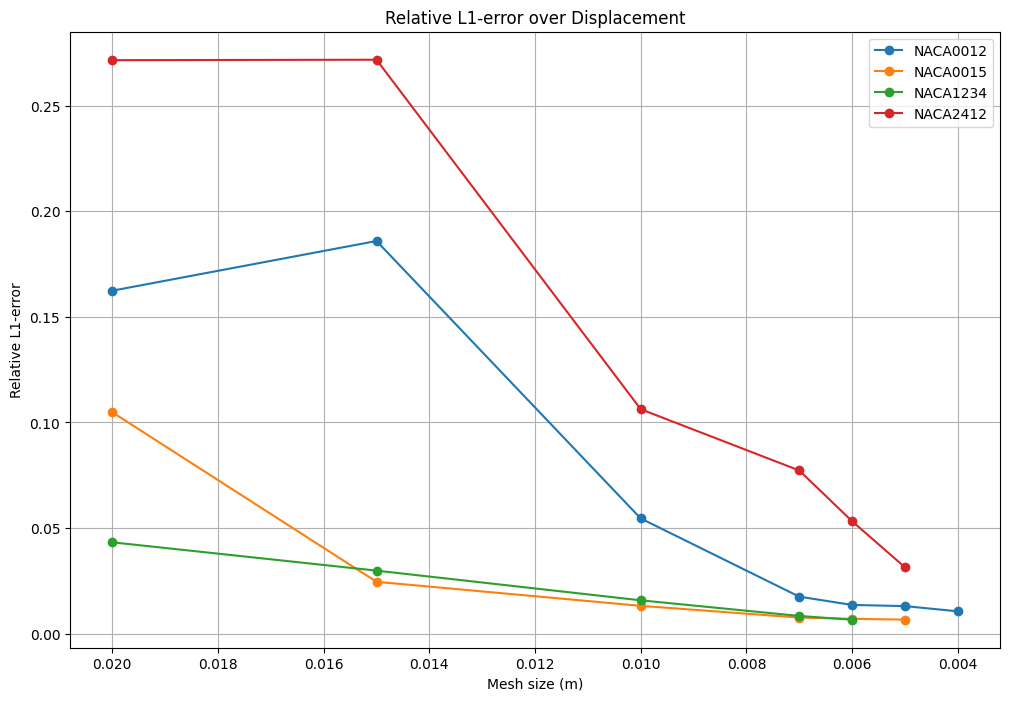

In [6]:
test_cases(DISPLACEMENT_TESTCASES, 'Relative L1-error over Displacement')

testcases/test_naca0012:
    Stress: mesh_size = 0.02: 0.494542
    Stress: mesh_size = 0.015: 0.495740
    Stress: mesh_size = 0.01: 0.494121
    Stress: mesh_size = 0.007: 0.405358
    Stress: mesh_size = 0.006: 0.379632
    Stress: mesh_size = 0.005: 0.364604
    Stress: mesh_size = 0.004: 0.342256

testcases/test_naca0015:
    Stress: mesh_size = 0.02: 0.576266
    Stress: mesh_size = 0.015: 0.573829
    Stress: mesh_size = 0.01: 0.513278
    Stress: mesh_size = 0.007: 0.487807
    Stress: mesh_size = 0.006: 0.467457
    Stress: mesh_size = 0.005: 0.448606
    Stress: mesh_size = 0.004: None

testcases/test_naca1234:
    Stress: mesh_size = 0.02: 0.534382
    Stress: mesh_size = 0.015: 0.511402
    Stress: mesh_size = 0.01: 0.455050
    Stress: mesh_size = 0.007: 0.418776
    Stress: mesh_size = 0.006: 0.398401
    Stress: mesh_size = 0.005: None
    Stress: mesh_size = 0.004: None

testcases/test_naca2412:
    Stress: mesh_size = 0.02: 0.594357
    Stress: mesh_size = 0.015: 0.587

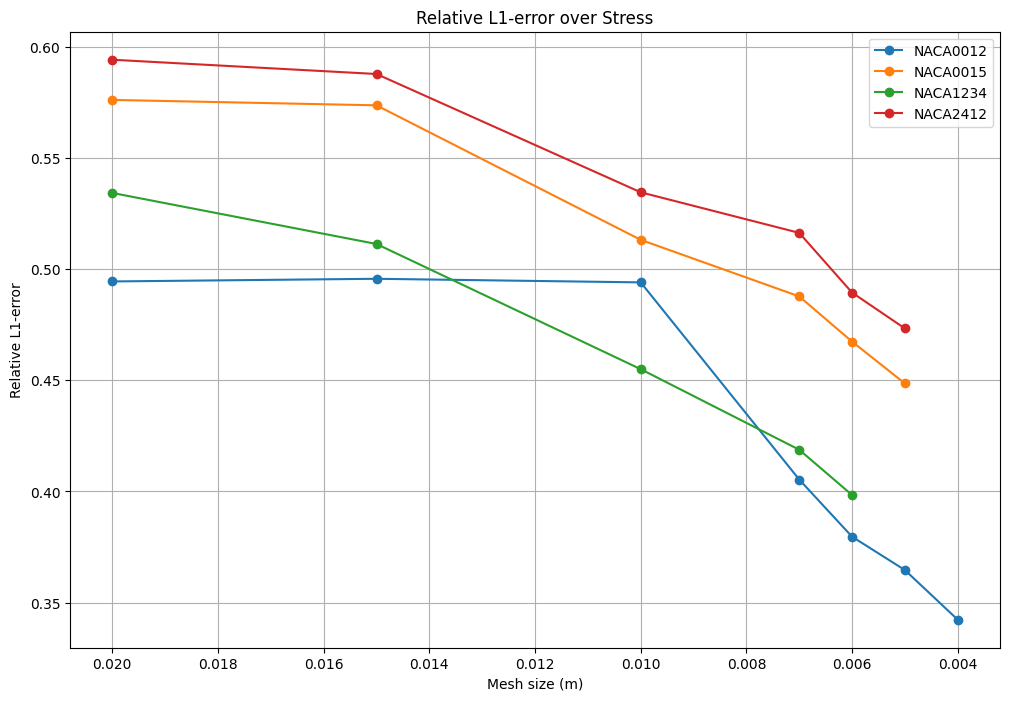

In [7]:
test_cases(STRESS_TESTCASES, 'Relative L1-error over Stress')

In [8]:
_, err_values = get_relative_error(
    f'{BASE_FOLDER}/test_naca0012',
    DEFAULT_COORD_COLS,
    ANSYS_STRESS_VALS_COLS,
    MATLAB_STRESS_VALS_COLS,
    'MATLAB_0.004',
    'ANSYS_0.004',
)

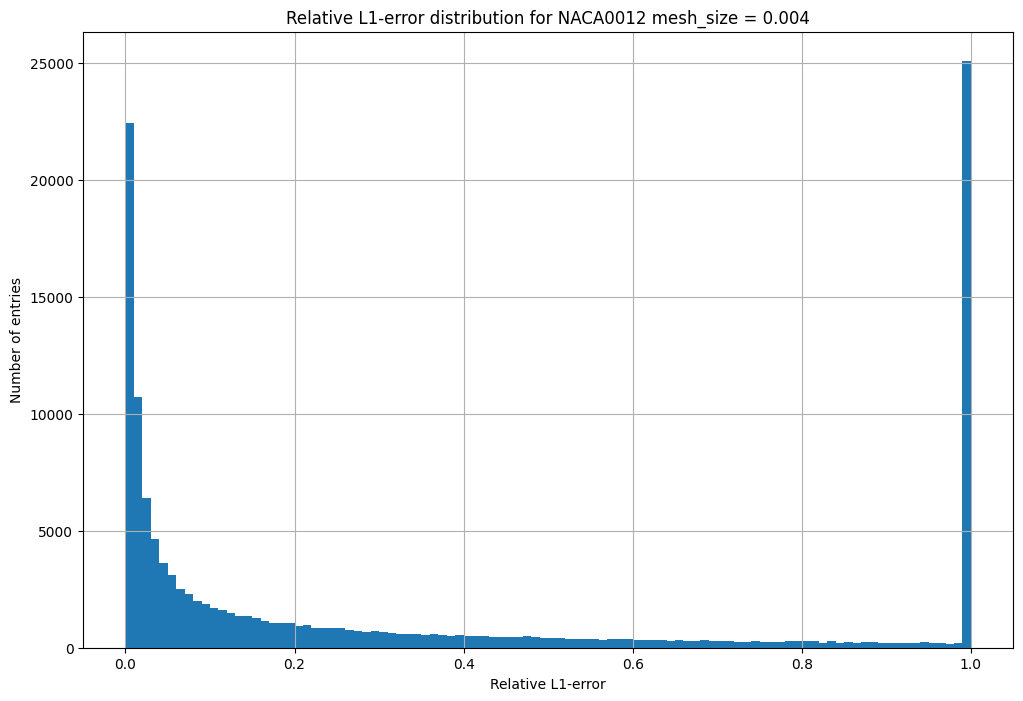

In [9]:
plt.figure(figsize=(12, 8))
plt.hist(err_values, bins=100)
plt.xlabel('Relative L1-error')
plt.ylabel('Number of entries')
plt.title('Relative L1-error distribution for NACA0012 mesh_size = 0.004')
plt.grid()
plt.show()

In [10]:
sum(err_values) / len(err_values)

0.3422562207609499

In [11]:
_err_values = list(filter(lambda x: x < 0.99, err_values))
sum(_err_values) / len(_err_values)

0.18530298339309856

In [12]:
len(list(filter(lambda x: x < 0.05, err_values))) / len(err_values)

0.3672583371753496

In [14]:
len(list(filter(lambda x: x > 0.99, err_values))) / len(err_values)

0.19266174888581528